# Análise Exploratória de Dados - Parques Urbanos

Este notebook tem como objetivo realizar uma análise exploratória de uma base pública relacionada a parques urbanos, tema que está diretamente vinculado ao nosso aplicativo. Através de visualizações e estatísticas descritivas, iremos examinar os diferentes aspectos e características dos parques, buscando identificar padrões, tendências e informações relevantes que possam contribuir para o aprimoramento das funcionalidades e serviços do app.

Este notebook realiza uma análise detalhada de uma base pública sobre parques urbanos, análise feita pelo Centro de Pesquisas Metropolitanas da USP, que tem como objetivo explorar suas principais características e extrair insights relevantes para o desenvolvimento do aplicativo. Através de visualizações de dados, estatísticas descritivas e gráficos interativos, investigamos aspectos como a distribuição dos parques por categoria, instância administrativa, tipos e áreas, além de análises temporais e correlações. Essa abordagem nos permitirá entender melhor os fatores que influenciam a criação e gestão dos parques e, assim, fornecer um suporte mais preciso às funcionalidades do aplicativo.



## Importações e Configurações

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('seaborn')

c:\Users\fernandaleao-ieg\OneDrive - Instituto Germinare\UDEMY\Banco de dados\IA\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\fernandaleao-ieg\AppData\Local\Temp\ipykernel_3792\3762093687.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Carregamento e Visualização Inicial dos Dados

In [2]:
df = pd.read_csv('parques.csv')  
df.head()

,ID,AREA,DATA,MUN,DIST,CLAS_CEM,CATEG,INSTANC,NOM_TIPO,NOM_PREP,...,NOM_PR_A,NOM_A,NOM_ET_A,ANO,AREA_M2,AREA_HA,AREA_KM2,GESTAO,OBS,FAIXA_AREA
0,55450,0.020305,172,SANTO ANDRE,CAPUAVA,VERDE 6,PARQUE URBANO,MUNICIPAL,PARQUE,NaN,...,NaN,Centenário da Imigração Japonesa,Parque Centenário da Imigração Japonesa,NaN,20305,2.030509,0.020305,NaN,NORIO ARIMURA,1-5 ha
1,55464,0.024255,173,SAO PAULO,SAO RAFAEL,VERDE 6,PRACA,MUNICIPAL,PRACA,NaN,...,NaN,NaN,Praça,NaN,24255,2.425526,0.024255,NaN,NaN,1-5 ha
2,55478,0.030075,174,SAO PAULO,SAPOPEMBA,VERDE 5,PRACA,MUNICIPAL,PRACA,NaN,...,NaN,Humberto Reis Costa,Praça Humberto Reis Costa,NaN,30075,3.007530,0.030075,NaN,NaN,1-5 ha
3,55492,0.017276,175,SAO PAULO,SAPOPEMBA,VERDE 6,PRACA,MUNICIPAL,PRACA,NaN,...,NaN,Noêmia Campos de Sica,Praça Noêmia Campos de Sica,NaN,17276,1.727610,0.017276,NaN,NaN,1-5 ha
4,55506,0.018761,176,SAO PAULO,SAO MATEUS,VERDE 6,PRACA,MUNICIPAL,PRACA,NaN,...,NaN,NaN,Praça,NaN,18760,1.876076,0.018761,NaN,NaN,1-5 ha


## Tratamento dos dados

### Verificando a porcentagem de valores ausentes em cada coluna


In [3]:
percentual_nulos = df.isnull().mean() * 100
print(percentual_nulos)


ID             0.000000
AREA           0.000000
DATA           0.000000
MUN            0.000000
DIST           3.728070
CLAS_CEM       0.000000
CATEG          0.000000
INSTANC        0.000000
NOM_TIPO       0.000000
NOM_PREP      78.728070
NOME          18.201754
NOM_ETIQ       0.000000
NOM_TP_A       0.000000
NOM_PR_A      78.728070
NOM_A         18.201754
NOM_ET_A       0.000000
ANO           63.377193
AREA_M2        0.000000
AREA_HA        0.000000
AREA_KM2       0.000000
GESTAO        66.228070
OBS           83.552632
FAIXA_AREA     0.000000
dtype: float64


#### Removendo colunas que têm mais de 50% de valores ausentes


In [4]:
df_limpo = df.loc[:, percentual_nulos <= 50]

### Tratando valores nulos restantes
Para colunas numéricas, substituindo por zero (se fizer sentido) ou pela média

In [5]:
colunas_numericas = df_limpo.select_dtypes(include=['float64', 'int64']).columns
df_limpo[colunas_numericas] = df_limpo[colunas_numericas].fillna(df_limpo[colunas_numericas].mean())


C:\Users\fernandaleao-ieg\AppData\Local\Temp\ipykernel_3792\2925481784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo[colunas_numericas] = df_limpo[colunas_numericas].fillna(df_limpo[colunas_numericas].mean())


### Para colunas categóricas, substituindo valores nulos por "Desconhecido"

In [6]:
colunas_categoricas = df_limpo.select_dtypes(include=['object']).columns
df_limpo[colunas_categoricas] = df_limpo[colunas_categoricas].fillna('Desconhecido')


C:\Users\fernandaleao-ieg\AppData\Local\Temp\ipykernel_3792\2488198618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo[colunas_categoricas] = df_limpo[colunas_categoricas].fillna('Desconhecido')


### Removendo linhas duplicadas

In [7]:

df_limpo = df_limpo.drop_duplicates()


### Garantindo que os tipos de dados estão corretos para as colunas restantes


In [8]:

# Removendo espaços em branco em colunas categóricas
df_limpo[colunas_categoricas] = df_limpo[colunas_categoricas].apply(lambda x: x.str.strip())


### teste de analises

In [9]:
fig1 = px.bar(df_limpo, x='CATEG', y='AREA', color='CATEG', title='Distribuição de Áreas por Categoria')
fig1.show()

c:\Users\fernandaleao-ieg\OneDrive - Instituto Germinare\UDEMY\Banco de dados\IA\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


#### Gráfico de barras para a contagem de parques por categoria


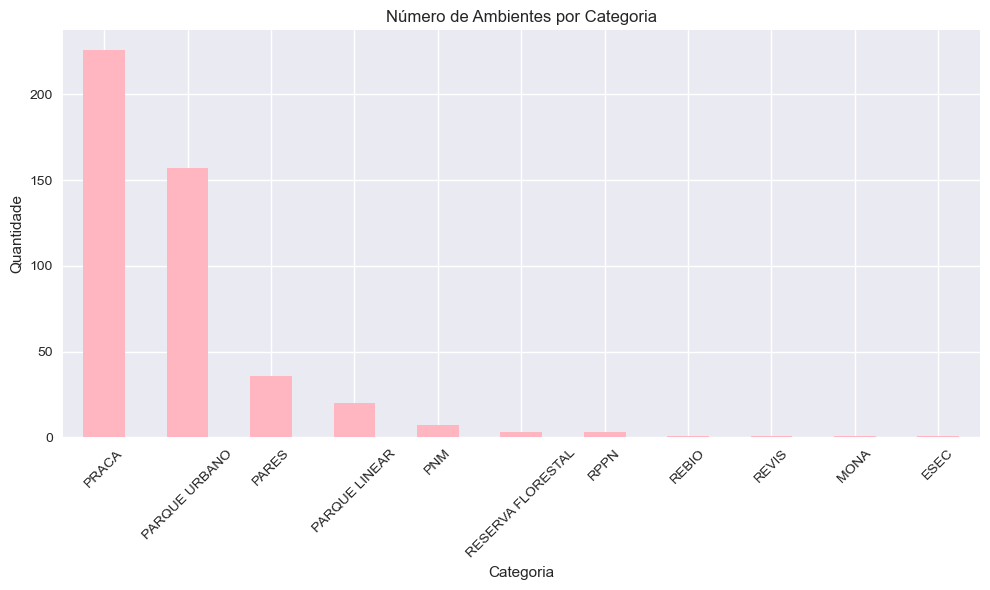

In [19]:

categoria_counts = df['CATEG'].value_counts()
plt.figure(figsize=(10, 6))
categoria_counts.plot(kind='bar', color='lightpink')
plt.title('Número de Ambientes por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### Gráfico de barras para a contagem de parques por instância administrativa


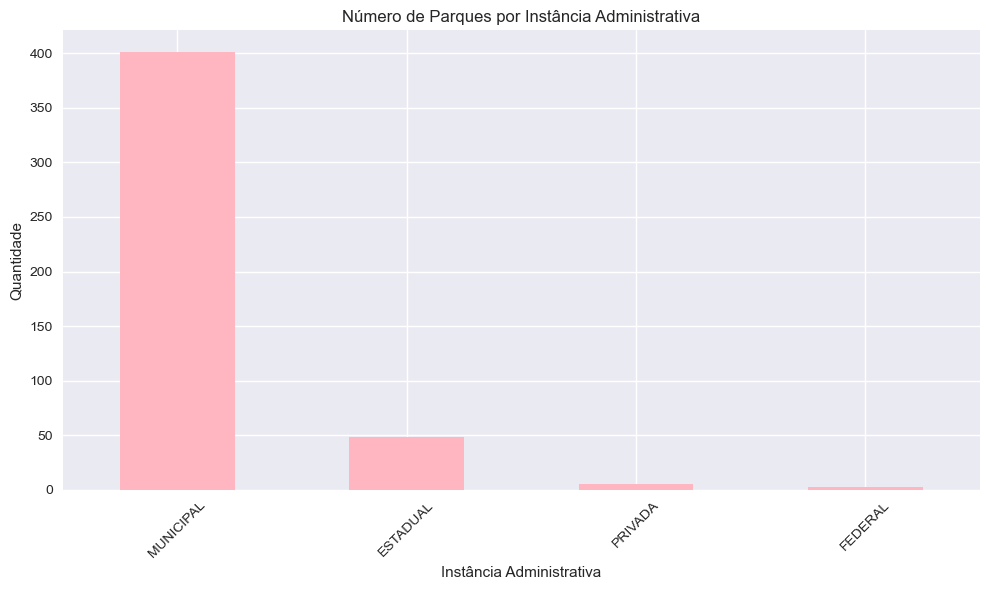

In [11]:
instancia_counts = df['INSTANC'].value_counts()
plt.figure(figsize=(10, 6))
instancia_counts.plot(kind='bar', color='lightpink')
plt.title('Número de Parques por Instância Administrativa')
plt.xlabel('Instância Administrativa')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Gráfico de barras para o número de parques por tipo


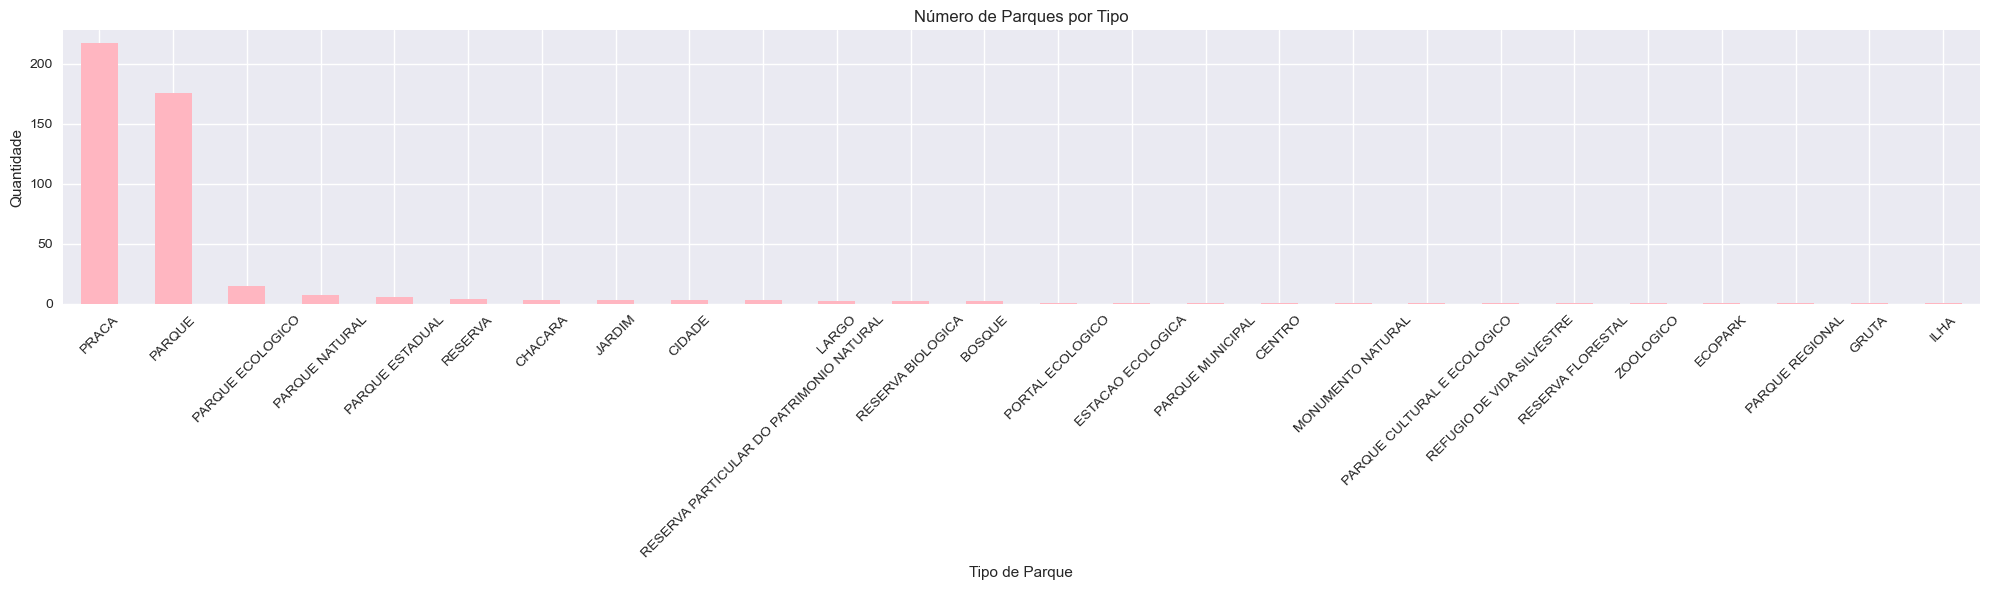

In [12]:

tipo_counts = df['NOM_TIPO'].value_counts()
plt.figure(figsize=(20, 6))
tipo_counts.plot(kind='bar', color='lightpink')
plt.title('Número de Parques por Tipo')
plt.xlabel('Tipo de Parque')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Gráfico de barras para o tamanho médio de parques por classificação


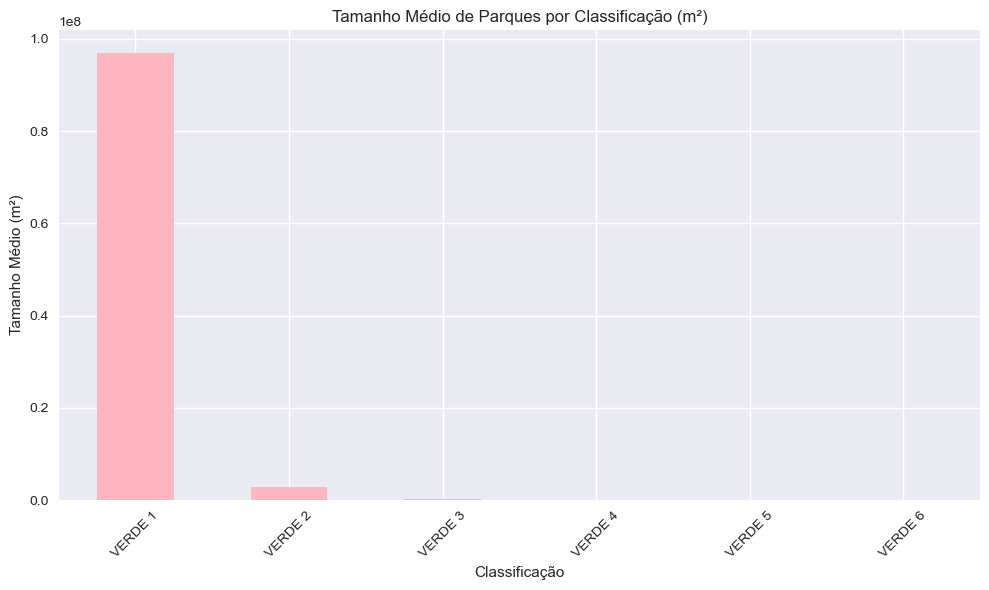

In [13]:

tamanho_medio_clas_cem = df.groupby('CLAS_CEM')['AREA_M2'].mean()
plt.figure(figsize=(10, 6))
tamanho_medio_clas_cem.plot(kind='bar', color='lightpink')
plt.title('Tamanho Médio de Parques por Classificação (m²)')
plt.xlabel('Classificação')
plt.ylabel('Tamanho Médio (m²)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Gráfico de barras para o número de parques por distrito dentro dos municípios


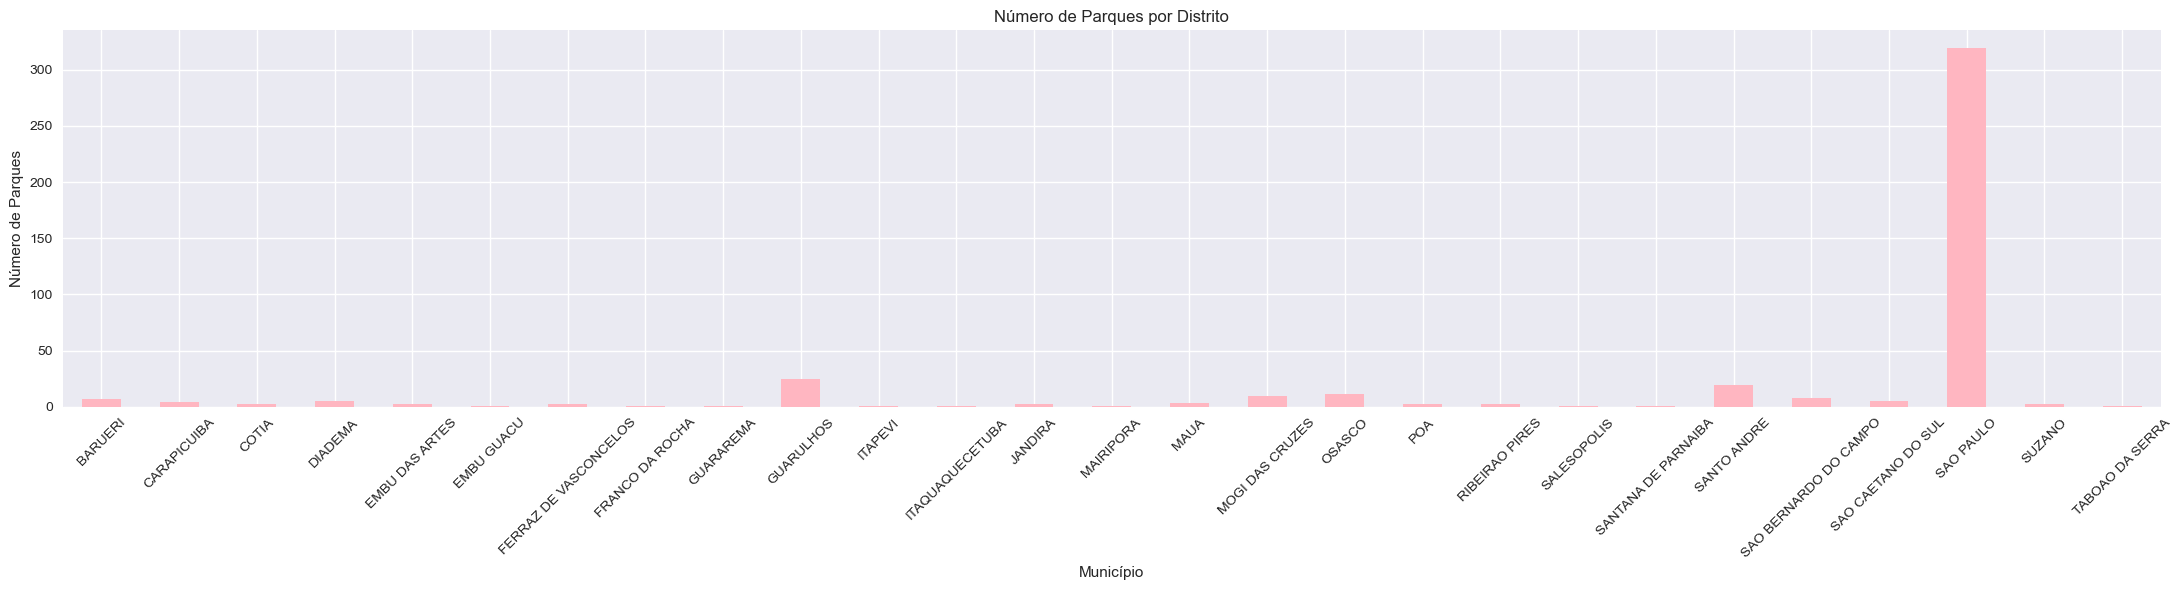

In [14]:

parques_por_distrito = df.groupby(['MUN', 'DIST']).size().reset_index(name='NUM_PARQUES')
plt.figure(figsize=(22, 6))
parques_por_distrito.groupby('MUN')['NUM_PARQUES'].sum().plot(kind='bar', color='lightpink')
plt.title('Número de Parques por Distrito')
plt.xlabel('Município')
plt.ylabel('Número de Parques')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Gráfico de barras para os 10 maiores parques por área


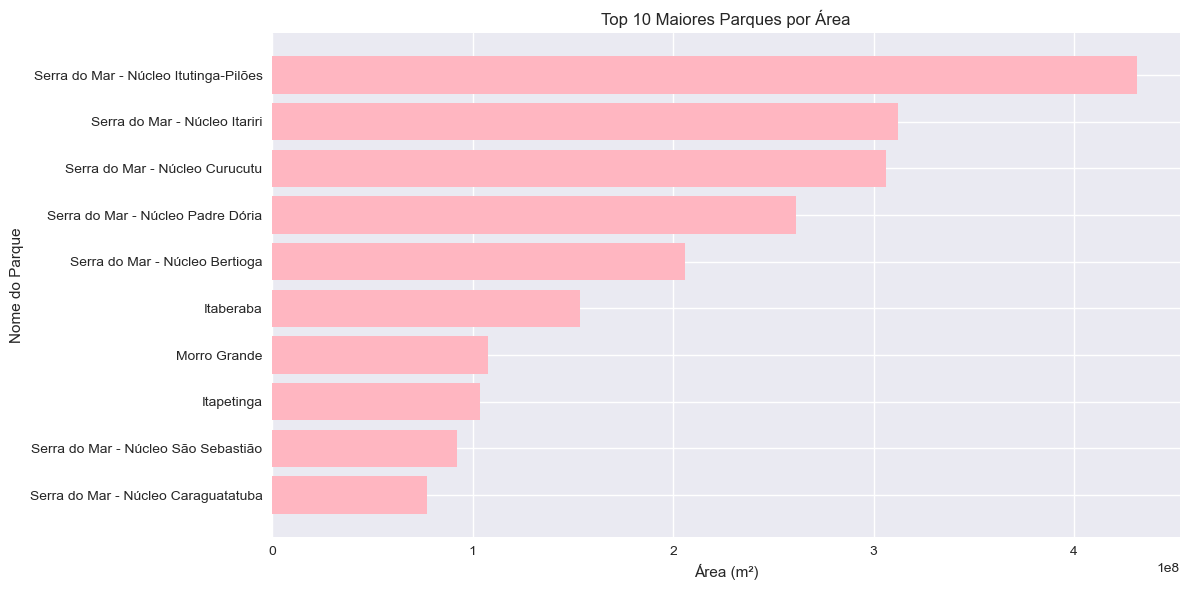

In [15]:

top10_maiores_parques = df[['NOM_A', 'AREA_M2']].sort_values(by='AREA_M2', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.barh(top10_maiores_parques['NOM_A'], top10_maiores_parques['AREA_M2'], color='lightpink')
plt.title('Top 10 Maiores Parques por Área')
plt.xlabel('Área (m²)')
plt.ylabel('Nome do Parque')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#### Gráfico de linha para a contagem de parques por ano de criação


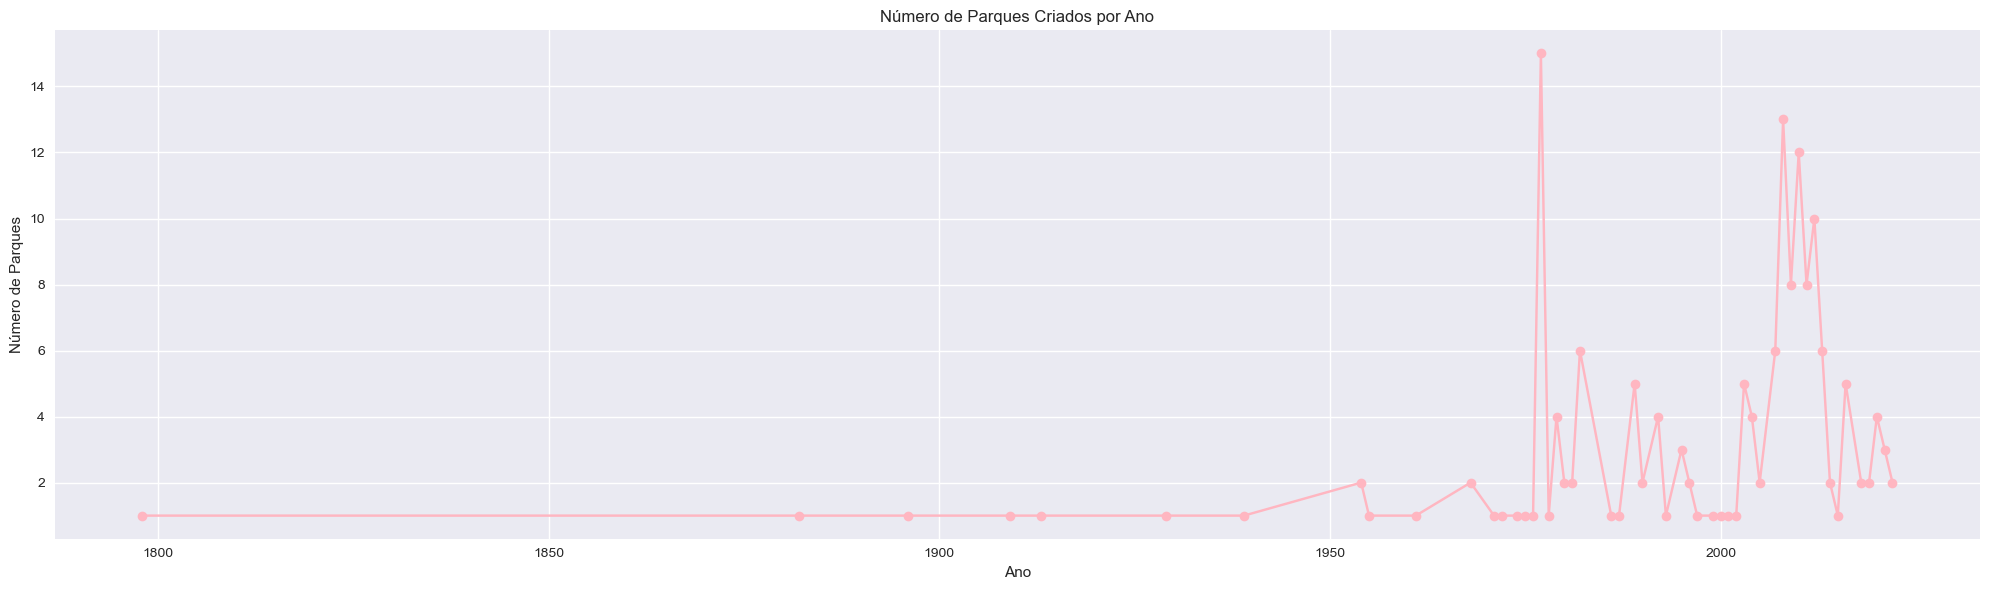

In [16]:

df['ANO'] = pd.to_numeric(df['ANO'], errors='coerce')
parques_por_ano = df['ANO'].dropna().value_counts().sort_index()
plt.figure(figsize=(20, 6))
parques_por_ano.plot(kind='line', marker='o', color='lightpink')
plt.title('Número de Parques Criados por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Parques')
plt.tight_layout()
plt.show()


#### Análise 9: Heatmap - Correlação entre Variáveis Numéricas

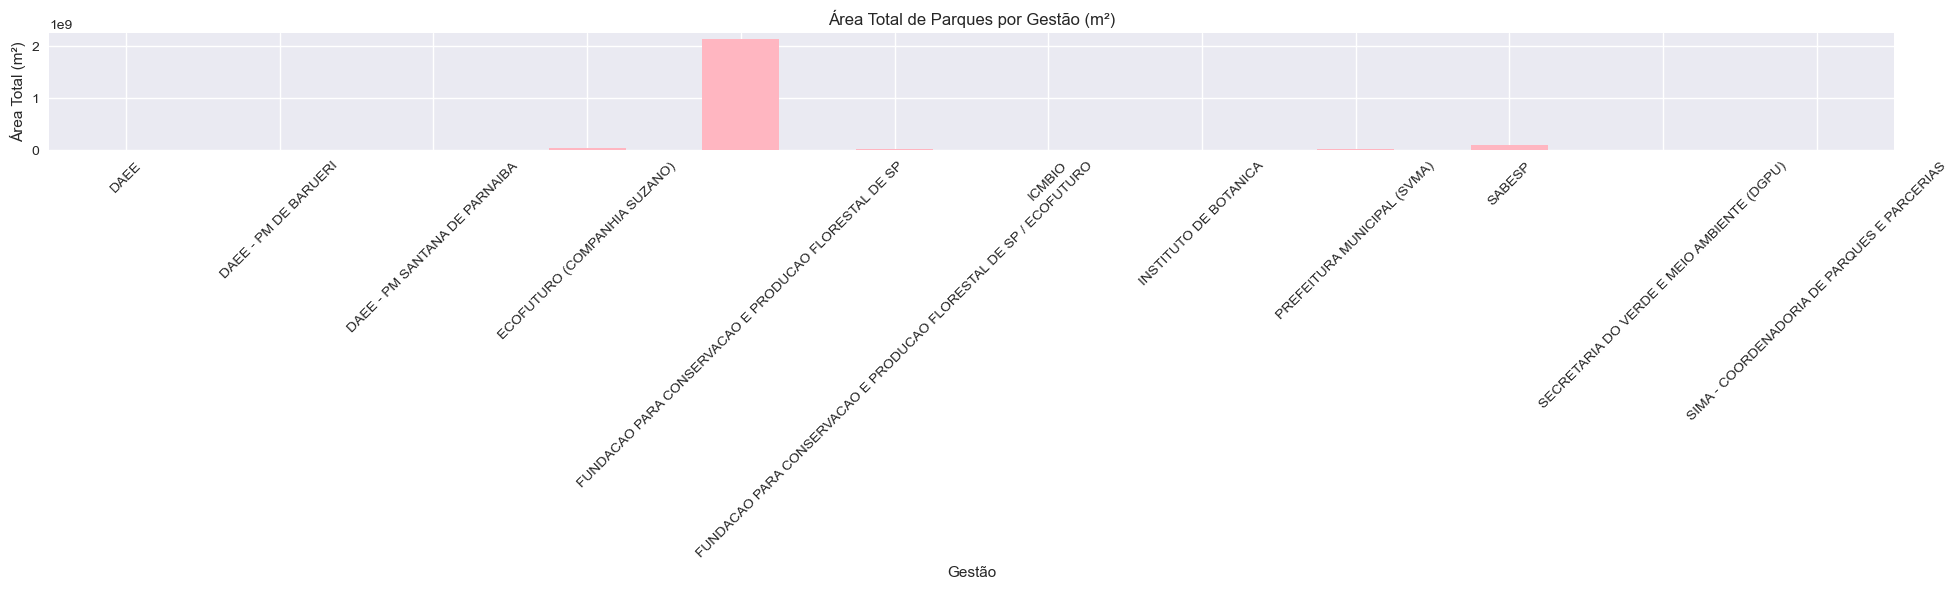

In [17]:

gestao_area_total = df.groupby('GESTAO')['AREA_M2'].sum()
plt.figure(figsize=(20, 6))
gestao_area_total.plot(kind='bar', color='lightpink')
plt.title('Área Total de Parques por Gestão (m²)')
plt.xlabel('Gestão')
plt.ylabel('Área Total (m²)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Gráfico de barras para a distribuição de tamanhos de parques por faixa


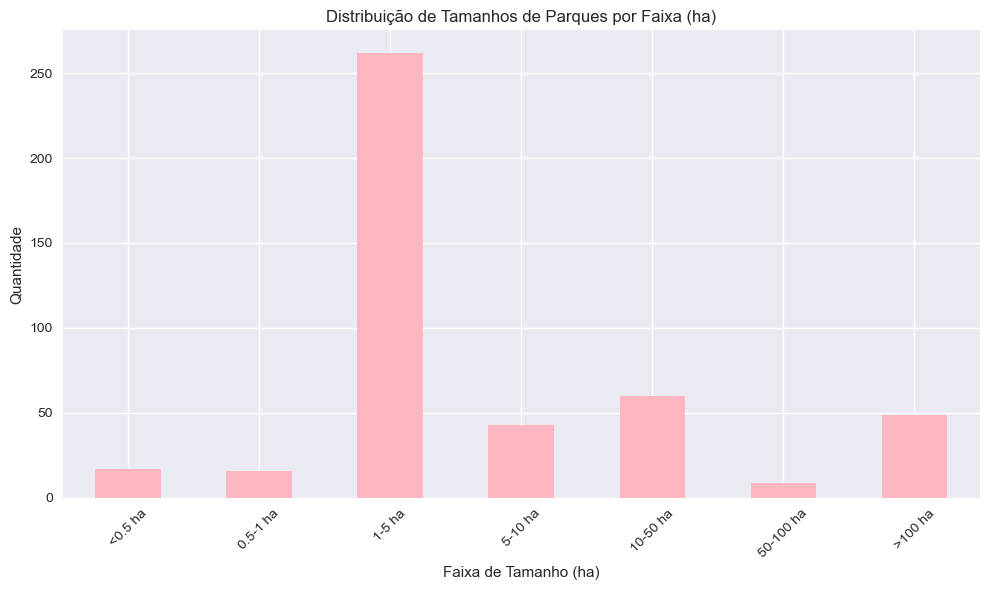

In [18]:

df['FAIXA_AREA'] = pd.cut(df['AREA_HA'], bins=[0, 0.5, 1, 5, 10, 50, 100, df['AREA_HA'].max()],
                          labels=['<0.5 ha', '0.5-1 ha', '1-5 ha', '5-10 ha', '10-50 ha', '50-100 ha', '>100 ha'])
faixa_area_counts = df['FAIXA_AREA'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
faixa_area_counts.plot(kind='bar', color='lightpink')
plt.title('Distribuição de Tamanhos de Parques por Faixa (ha)')
plt.xlabel('Faixa de Tamanho (ha)')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# ha significa hectare